In [7]:
import pandas as pd
data=pd.read_csv('pizza_price_prediction_5thquestion.csv')
display(data)

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


## a)	Count the number of null values in the pizza dataset and replace null values with average of the concerned columns. 

In [6]:
data.isnull().sum()

company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

## b)	Calculate average price of pizza prepared by each company.

In [103]:
data['price_card']=[int(i[1:]) for i in data['price_cad']]
data.groupby('company')['price_card'].mean()

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price_card, dtype: float64

## c)	Find the companies, who prepared pizzas with different variants with same diameter.

In [60]:
data.groupby(['company','diameter']).filter(lambda x:x['variant'].nunique() > 1)['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

## d)	Which company has more pizzas? Show the result with graph. 

<BarContainer object of 5 artists>

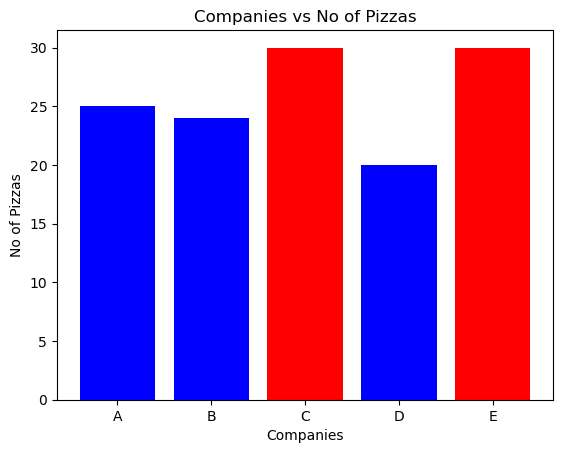

In [94]:
import matplotlib.pyplot as plt
data.groupby('company')['variant'].count()
col=['red' if i==a.max() else 'blue' for i in a]
plt.title('Companies vs No of Pizzas')
plt.xlabel('Companies')
plt.ylabel('No of Pizzas')
plt.bar(a.index,a,color=col)

## e)	Check whether the pizza data set contains null value or not. /Count the no. of null values in the pizza dataset./ Find the number of missing data points per column. 

In [102]:
print('No of null values in each column is given by:\n\nColumn Name:\tNo of Null Values\n',data.isnull().sum())
print('\n\nTotal null values in the dataset are:',data.isnull().sum().sum())

No of null values in each column is given by:

Column Name:	No of Null Values
 company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
price              0
dtype: int64


Total null values in the dataset are: 0


## f)	Rename the column price_cad as price.

In [109]:
data.rename(columns={'price_cad':'price'})

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price,price_card
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29,29
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no,25,25
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19,19
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,22,22
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30,30
...,...,...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes,11,11
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes,14,14
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes,17,17
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes,12,12


## g)	Identify the number of companies in each category(variant) 

In [141]:
data.groupby('variant')['company'].unique()

variant
BBQ_meat_fiesta         [C, E]
BBQ_sausage                [C]
american_classic           [C]
american_favorite          [A]
classic              [B, D, E]
crunchy              [B, D, E]
double_decker        [B, D, E]
double_mix              [A, D]
double_signature           [A]
extravaganza               [C]
gournet_greek              [C]
italian_veggie             [C]
meat_eater                 [C]
meat_lovers             [A, D]
neptune_tuna               [C]
new_york             [B, D, E]
spicy tuna                 [E]
spicy_tuna                 [C]
super_supreme              [A]
thai_veggie                [C]
Name: company, dtype: object

##  h)	Identify which type of pizza is more expensive 

In [172]:
data[data['price_card']==max(data['price_card'])]

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price,price_card
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30,30


## i)	Find diameter of jumbo size pizza 

In [179]:
a=data[data['size']=='jumbo']
print('Diameters of all the jumbo sized pizzas are:\n')
a['diameter']

Diameters of all the jumbo sized pizzas are:



0       22 inch
1       20 inch
4       18 inch
5     18.5 inch
6       16 inch
10    18.5 inch
11      16 inch
15    18.5 inch
16      16 inch
20      22 inch
21    18.5 inch
79    18.5 inch
80      16 inch
84      22 inch
85    18.5 inch
Name: diameter, dtype: object

## j)	Any jumbo pizza with diameter less than 16 exists, remove such rows. 

In [211]:
a=data[data['size']=='jumbo']
a['dia']=[float(i[:-5]) for i in a['diameter']]
a[a['dia'] < 16]

C:\Users\y21cs164\AppData\Local\Temp\ipykernel_7188\3796261850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['dia']=[float(i[:-5]) for i in a['diameter']]


,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price,price_card,dia


## k)	Calculate average price of a pizza prepared by company A.

In [214]:
data.groupby('company')['price'].mean()

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price, dtype: float64